In [ ]:
import urllib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, fbeta_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
urllib.request.urlretrieve('https://github.com/zbz95/Intro_to_ML/raw/main/attrition.csv', 'attrition.csv')
df = pd.read_csv('attrition.csv')

In [ ]:
df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobSatisfaction,RelationshipSatisfaction,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41.0,Travel_Rarely,Sales,1,2,Life Sciences,4,1,6,4.0,0,5
1,No,49.0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,4,10,7.0,1,7
2,Yes,37.0,Travel_Rarely,Research & Development,2,2,Other,3,2,0,0.0,0,0
3,No,33.0,Travel_Frequently,Research & Development,3,4,Life Sciences,3,3,8,7.0,3,0
4,No,27.0,Travel_Rarely,Research & Development,2,1,Medical,2,4,2,2.0,2,2


# Dataset INFO:

Attrition - Target column - Whether person left company or not

All other columns are self explanatory. If you have any questions don't hesitate to ask in Telegram

In [ ]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [ ]:
features = [k for k in df.columns if k != 'Attrition']

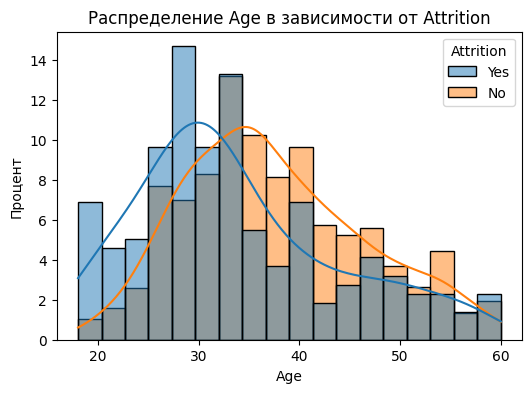

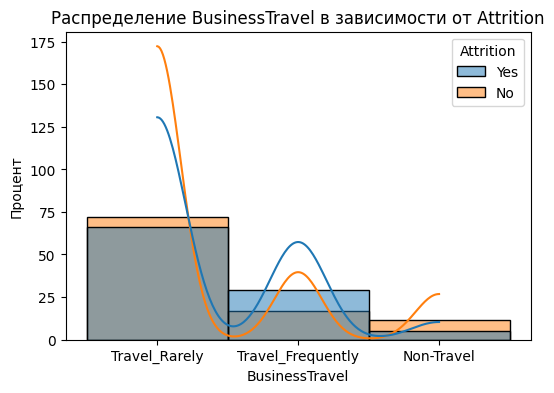

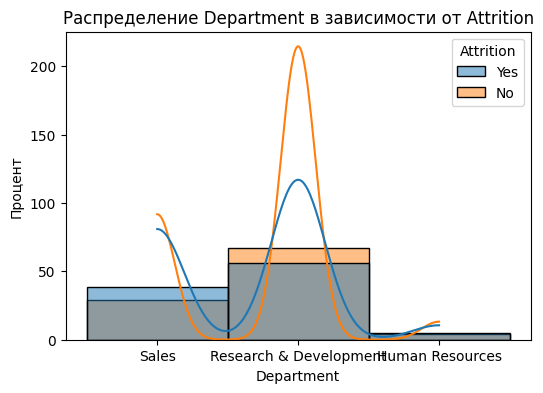

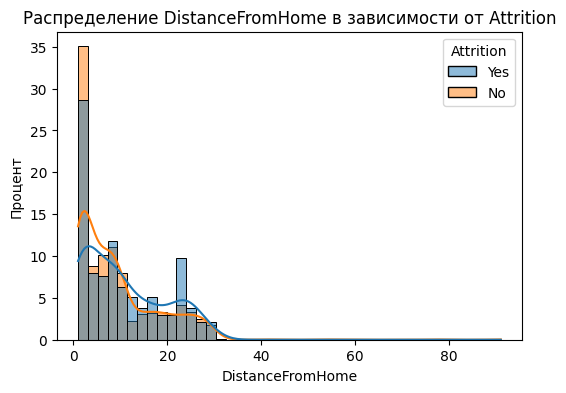

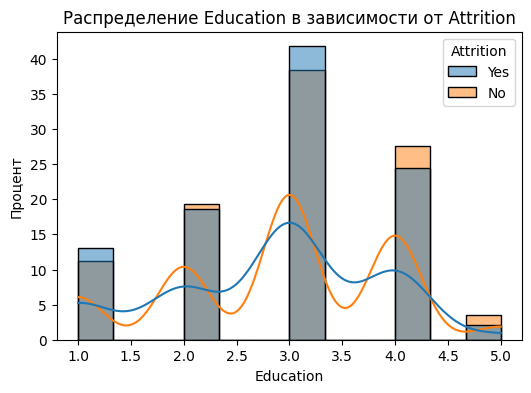

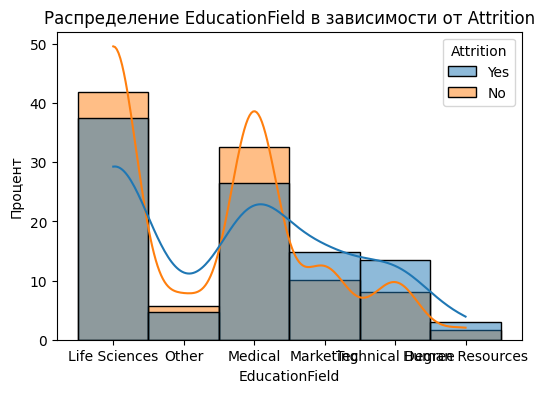

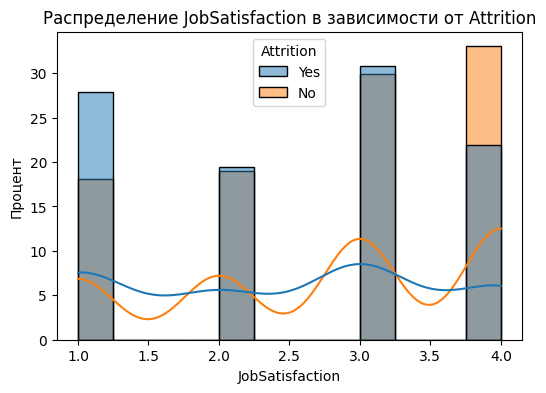

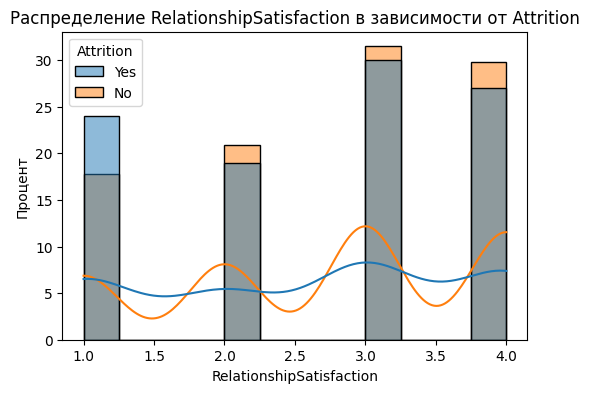

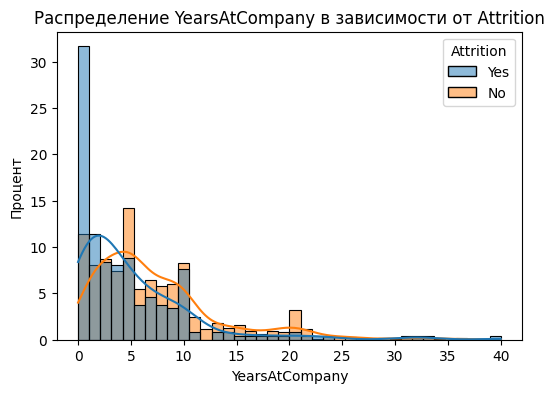

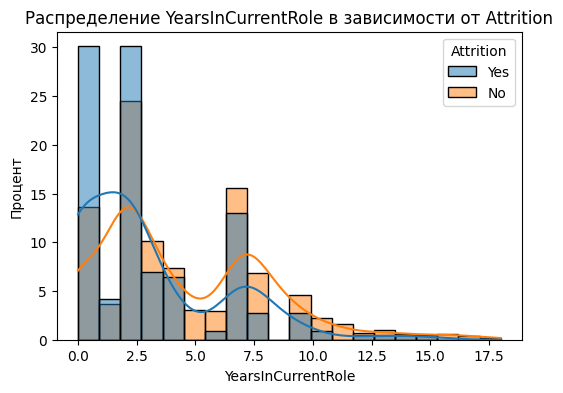

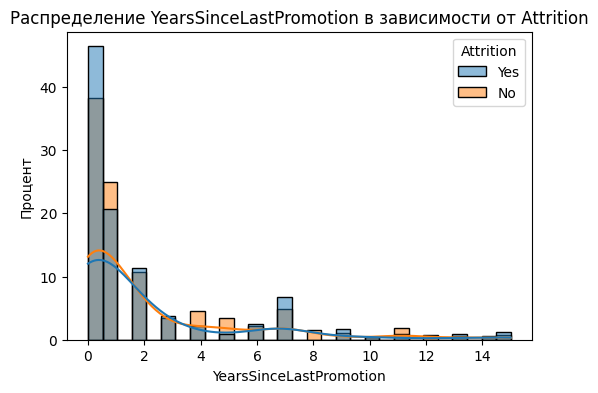

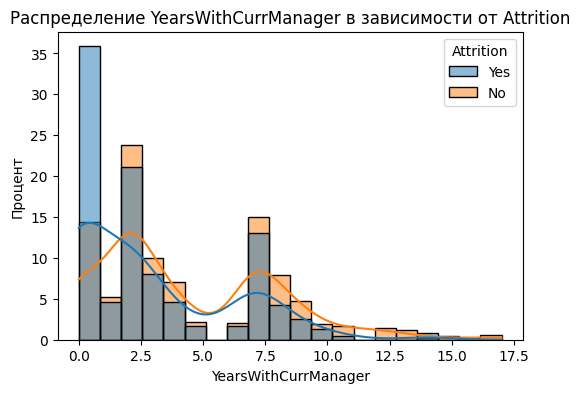

In [ ]:
#просмотрю диаграммы для понимания насколько сильно влияет  features на  Attrition
for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Attrition', common_norm=False, stat='percent', kde=True)
    plt.title(f"Распределение {col} в зависимости от Attrition")
    plt.xlabel(col)
    plt.ylabel("Процент")
    plt.show()

#Exercise 1

Check if there are outliers in numeric columns. Numeric columns are Age, DistanceFromHome and others which contain only numeric data. Points are considered to be outliers if their Z score is greater than 5 (Points that are 5 standard deviations away from mean). Plot the histograms, and decide what to do with outliers. Ignore/Trim Outliers/Delete Outliers

In [ ]:
### Your code here
train, test = train_test_split(df, test_size=0.3, random_state = 42, stratify=df['Attrition'])

In [ ]:
train

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobSatisfaction,RelationshipSatisfaction,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
853,No,19.0,Travel_Rarely,Research & Development,9,2,Life Sciences,1,3,1,1.0,0,0
435,Yes,33.0,Travel_Rarely,Research & Development,15,1,Medical,3,4,7,6.0,7,7
587,No,52.0,Travel_Rarely,Research & Development,11,4,Life Sciences,3,2,5,2.0,1,4
1170,No,27.0,Travel_Frequently,Research & Development,2,3,Medical,4,3,4,2.0,1,2
159,No,34.0,Travel_Frequently,Sales,2,4,Marketing,3,4,4,3.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,No,46.0,Non-Travel,Research & Development,7,4,Medical,3,3,1,0.0,0,0
963,No,38.0,Travel_Rarely,Sales,2,2,Life Sciences,1,4,7,7.0,1,7
734,No,22.0,Travel_Rarely,Research & Development,8,1,Life Sciences,1,1,4,3.0,1,1
1315,No,36.0,Travel_Rarely,Research & Development,2,4,Other,2,4,1,NaN,0,0


In [ ]:
train.describe()

#явных видимых ошибок не выявлено, но  на первый взгляд есть outliner в DistanceFromHome

,Age,DistanceFromHome,Education,JobSatisfaction,RelationshipSatisfaction,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,947.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,941.000000,1029.000000,1029.000000
mean,36.890180,9.418853,2.893100,2.706511,2.744412,6.938776,4.211477,2.189504,4.130224
std,9.252997,8.538906,1.031715,1.109460,1.088398,5.950930,3.528745,3.222919,3.535334
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,7.000000,3.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,15.000000,4.000000,4.000000,4.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,77.000000,5.000000,4.000000,4.000000,37.000000,17.000000,15.000000,17.000000


<Axes: ylabel='Count'>

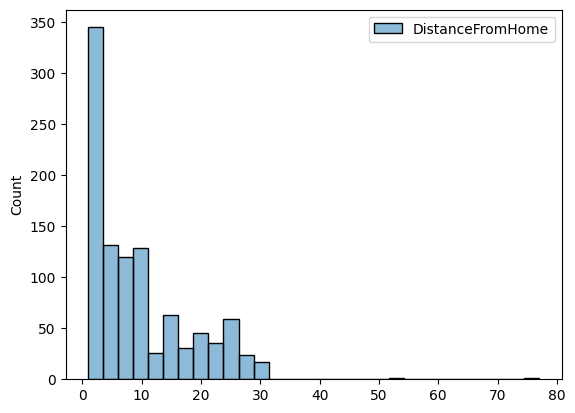

In [ ]:
sns.histplot(train[['DistanceFromHome']])
#Outliers: 1. DistanceFromHome = 53 и 77 (сильно отличаются от большинства)

In [ ]:
num_features = [col for col in train.select_dtypes(include='number').columns]

In [ ]:
outliers = list()
for col in num_features:
  mean = train[col].mean()
  std = train[col].std()
  z_score = np.abs((train[col]-mean)/std)

  if len(train.loc[z_score>5, col]) > 0:
    outliers.append(train.loc[z_score>5, col])

In [ ]:
outliers

[230    54
 790    77
 Name: DistanceFromHome, dtype: int64,
 98    37
 Name: YearsAtCompany, dtype: int64]

<Axes: ylabel='Count'>

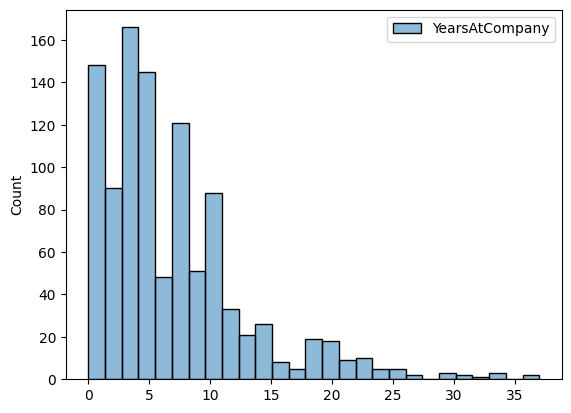

In [ ]:
sns.histplot(train[['YearsAtCompany']])

In [ ]:
def trim_outliers(data):
  data['DistanceFromHome'] = data['DistanceFromHome'].clip(upper=40)

  return data

In [ ]:
train = trim_outliers(train)
test = trim_outliers(test)

In [ ]:
#I will ignore 'YearsAtCompany' outliner

# Exercise 2.

Fill empty values in the dataframe. There are 3 columns with empty values. Age, BusinessTravel and YearsInCurrentRole.

You can use median value of Age to fill empty values in Age column.

You can use most frequent value of BusinessTravel to fill mepty values.

For YearsInCurrentRole build the model that predicts YearsInCurrentRole given YearsAtCompany and YearsWithCurrManager. You can use any model, for example KNeighborsRegressor

In [ ]:
train.isna().sum()

,0
Attrition,0
Age,82
BusinessTravel,101
Department,0
DistanceFromHome,0
Education,0
EducationField,0
JobSatisfaction,0
RelationshipSatisfaction,0
YearsAtCompany,0


In [ ]:
# Your code here
train['Age'].mean(), train['Age'].median()

(36.89017951425554, 35.0)

In [ ]:
test['Age'].mean(), test['Age'].median()

(36.75373134328358, 35.0)

In [ ]:
train['BusinessTravel'].value_counts()
#Те у кого пусто в этой колонке, возможно, не ездили никуда

,count
BusinessTravel,
Travel_Rarely,662
Travel_Frequently,164
Non-Travel,102


In [ ]:
test['BusinessTravel'].value_counts()

,count
BusinessTravel,
Travel_Rarely,282
Travel_Frequently,82
Non-Travel,34


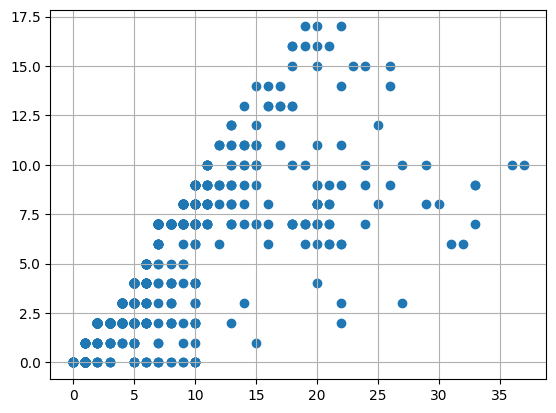

In [ ]:
plt.scatter(train['YearsAtCompany'], train['YearsInCurrentRole'])
plt.grid()

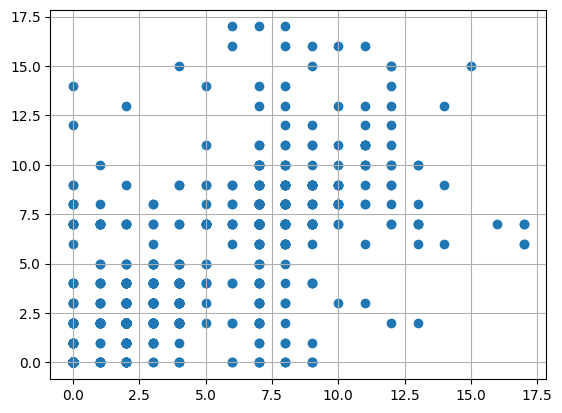

In [ ]:
plt.scatter(train['YearsWithCurrManager'], train['YearsInCurrentRole'])
plt.grid()

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
data = train.loc[train['YearsInCurrentRole'].notna()]

model.fit(data[['YearsAtCompany', 'YearsWithCurrManager']], data['YearsInCurrentRole'])

KNeighborsRegressor()

In [ ]:
model.predict(train.loc[train['YearsInCurrentRole'].isna(), ['YearsAtCompany', 'YearsWithCurrManager']])

array([11. , 10. ,  8.8,  2. ,  1.4,  0.2,  3.8,  7.8,  6.4,  3. ,  7. ,
        7.8,  1.4,  2.4,  2.8,  2.4, 11.2,  2. ,  7.8,  0.2,  2.8,  6.8,
        0.2, 10. ,  9.6,  0. ,  9.2,  8.4,  6.8,  0. ,  1.4,  2.6,  9.2,
        0. ,  6.4,  2.8,  9.2,  8. ,  0.2,  6.8,  0.2,  1.6,  7.8,  7.8,
        5. ,  0. ,  2. ,  3.6,  9.8,  8.2,  2. ,  7.4,  0. ,  6.8,  9.6,
        6. , 11. ,  8.4,  1.6,  6.8,  3.2,  8.6,  9.2,  0.2,  9.4,  7. ,
        6.8,  0.2,  0.2,  1.4,  0.2,  2. ,  2. ,  3. ,  1.4,  8.2,  1.6,
        2.6,  2. ,  2.8,  8.2, 12.4,  1.4,  8.8, 10.6,  0.2,  2.4,  0.2])

In [ ]:
def fill_na(data):

  data['Age'] = data['Age'].fillna(35)
  data['BusinessTravel'] = data['BusinessTravel'].fillna('Travel_Rarely')

  if len(data.loc[data['YearsInCurrentRole'].isna()])>0:
    data.loc[data['YearsInCurrentRole'].isna(), 'YearsInCurrentRole'] = model.predict(data.loc[data['YearsInCurrentRole'].isna(),
                                                                                               ['YearsAtCompany', 'YearsWithCurrManager']])

  return data

In [ ]:
train = fill_na(train)
test = fill_na(test)

In [ ]:
train.isna().sum()

,0
Attrition,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
JobSatisfaction,0
RelationshipSatisfaction,0
YearsAtCompany,0


#Exercise 3

Encode categorical columns. These are BusinessTravel,  	Department and EducationField.

BusinessTravel is ordinal feature so use ordinal encoding. Use one hot encoding for Department and use Supervised Target encoding for EducationField.

In [ ]:
#Your code here
train['BusinessTravel'].map({'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2})



,BusinessTravel
853,0
435,0
587,0
1170,1
159,1
...,...
927,0
365,2
963,0
734,0


In [ ]:
df['Department'].value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


In [ ]:
pd.get_dummies(train['Department']).astype(int)

,Human Resources,Research & Development,Sales
853,0,1,0
435,0,1,0
587,0,1,0
1170,0,1,0
159,0,0,1
...,...,...,...
927,0,1,0
365,0,1,0
963,0,0,1
734,0,1,0


In [ ]:
pd.concat([train, pd.get_dummies(train['Department']).astype(int)], axis=1)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobSatisfaction,RelationshipSatisfaction,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Human Resources,Research & Development,Sales
853,No,19.0,Travel_Rarely,Research & Development,9,2,Life Sciences,1,3,1,1.0,0,0,0,1,0
435,Yes,33.0,Travel_Rarely,Research & Development,15,1,Medical,3,4,7,6.0,7,7,0,1,0
587,No,52.0,Travel_Rarely,Research & Development,11,4,Life Sciences,3,2,5,2.0,1,4,0,1,0
1170,No,27.0,Travel_Frequently,Research & Development,2,3,Medical,4,3,4,2.0,1,2,0,1,0
159,No,34.0,Travel_Frequently,Sales,2,4,Marketing,3,4,4,3.0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,No,35.0,Travel_Rarely,Research & Development,2,4,Life Sciences,2,4,16,14.0,5,12,0,1,0
365,No,46.0,Non-Travel,Research & Development,7,4,Medical,3,3,1,0.0,0,0,0,1,0
963,No,38.0,Travel_Rarely,Sales,2,2,Life Sciences,1,4,7,7.0,1,7,0,0,1
734,No,22.0,Travel_Rarely,Research & Development,8,1,Life Sciences,1,1,4,3.0,1,1,0,1,0


In [ ]:
train['Attrition'] = train['Attrition'].map({'No': 0, 'Yes': 1})

In [ ]:
train

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobSatisfaction,RelationshipSatisfaction,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
853,0,19.0,Travel_Rarely,Research & Development,9,2,Life Sciences,1,3,1,1.0,0,0
435,1,33.0,Travel_Rarely,Research & Development,15,1,Medical,3,4,7,6.0,7,7
587,0,52.0,Travel_Rarely,Research & Development,11,4,Life Sciences,3,2,5,2.0,1,4
1170,0,27.0,Travel_Frequently,Research & Development,2,3,Medical,4,3,4,2.0,1,2
159,0,34.0,Travel_Frequently,Sales,2,4,Marketing,3,4,4,3.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0,46.0,Non-Travel,Research & Development,7,4,Medical,3,3,1,0.0,0,0
963,0,38.0,Travel_Rarely,Sales,2,2,Life Sciences,1,4,7,7.0,1,7
734,0,22.0,Travel_Rarely,Research & Development,8,1,Life Sciences,1,1,4,3.0,1,1
1315,0,36.0,Travel_Rarely,Research & Development,2,4,Other,2,4,1,0.2,0,0


In [ ]:
for EducationF in ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree','Human Resources','Other']:
  print(EducationF, train.loc[train['EducationField']==EducationF, 'Attrition'].mean())

Life Sciences 0.14797136038186157
Medical 0.14330218068535824
Marketing 0.23275862068965517
Technical Degree 0.19811320754716982
Human Resources 0.3333333333333333
Other 0.08163265306122448


In [ ]:
train['EducationField'].map({'Life Sciences':0.144, 'Medical':0.141, 'Marketing':0.238, 'Technical Degree':0.197,'Human Resources':0.312,'Other':0.068})

,EducationField
853,0.144
435,0.141
587,0.144
1170,0.141
159,0.238
...,...
927,0.144
365,0.141
963,0.144
734,0.144


In [ ]:
def encode_cats(data):
  data['BusinessTravel'] = data['BusinessTravel'].map({'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2})
  dep_dummies = pd.get_dummies(data['Department']).astype(int)
  data = pd.concat([data, dep_dummies], axis=1)
  data.drop('Department', axis=1, inplace=True)
  data['EducationField']= data['EducationField'].map({'Life Sciences':0.144, 'Medical':0.141, 'Marketing':0.238, 'Technical Degree':0.197,'Human Resources':0.312,'Other':0.068})

  return data

In [ ]:
train = encode_cats(train)

In [ ]:
train

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EducationField,JobSatisfaction,RelationshipSatisfaction,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Human Resources,Research & Development,Sales
853,0,19.0,0,9,2,0.144,1,3,1,1.0,0,0,0,1,0
435,1,33.0,0,15,1,0.141,3,4,7,6.0,7,7,0,1,0
587,0,52.0,0,11,4,0.144,3,2,5,2.0,1,4,0,1,0
1170,0,27.0,1,2,3,0.141,4,3,4,2.0,1,2,0,1,0
159,0,34.0,1,2,4,0.238,3,4,4,3.0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0,46.0,2,7,4,0.141,3,3,1,0.0,0,0,0,1,0
963,0,38.0,0,2,2,0.144,1,4,7,7.0,1,7,0,0,1
734,0,22.0,0,8,1,0.144,1,1,4,3.0,1,1,0,1,0
1315,0,36.0,0,2,4,0.068,2,4,1,0.2,0,0,0,1,0


In [ ]:
test = encode_cats(test)

In [ ]:
test['Attrition'] = test['Attrition'].map({'No': 0, 'Yes': 1})

In [ ]:
test

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EducationField,JobSatisfaction,RelationshipSatisfaction,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Human Resources,Research & Development,Sales
397,0,25.0,0,4,2,0.144,4,2,5,4.0,1,3,0,0,1
832,0,37.0,0,25,2,0.141,4,3,6,2.0,1,3,0,1,0
483,0,35.0,0,25,2,0.068,4,4,3,1.4,0,2,0,1,0
456,0,31.0,0,7,3,0.144,4,3,5,4.0,0,1,0,0,1
1342,0,34.0,0,4,3,0.144,4,4,5,3.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0,38.0,1,2,2,0.144,4,3,1,0.0,0,0,0,1,0
1098,0,35.0,2,8,2,0.144,4,3,2,2.0,2,2,0,1,0
514,1,33.0,1,3,3,0.144,1,1,10,8.0,9,7,0,1,0
1442,1,29.0,0,1,4,0.141,4,2,2,2.0,2,2,0,1,0


#Exercise 4

Create new columns with feature interaction. For example you can multiply JobSatisfaction with	RelationshipSatisfaction and divide YearsInCurrentRole by YearsAtCompany

In [ ]:
train['new_feature1'] = train['JobSatisfaction']*train['RelationshipSatisfaction']
train['new_feature2'] = train['YearsInCurrentRole']/train['YearsAtCompany']

In [ ]:
test['new_feature1'] = test['JobSatisfaction']*test['RelationshipSatisfaction']
test['new_feature2'] = test['YearsInCurrentRole']/test['YearsAtCompany']

In [ ]:
train['Attrition']=train['Attrition'].map({0: 'No', 1: 'Yes'})
test['Attrition']=test['Attrition'].map({0: 'No', 1: 'Yes'})


#Exercise 5

Create the model that predicts attrition. For example RandomForestClassifier (choose model yourself)

In [ ]:
features2 = features = [k for k in train.columns if k != 'Attrition']

In [ ]:
# Your code here
mode_rf = RandomForestClassifier(n_estimators=100,  max_depth=20)
mode_rf.fit(train[features2], train['Attrition'])


RandomForestClassifier(max_depth=20)

In [ ]:
test['predictions'] = mode_rf.predict(test[features2])

In [ ]:
accuracy_score(test['Attrition'], test['predictions'])

0.8208616780045351